<a href="https://colab.research.google.com/github/Louis5228/DLP-lab/blob/main/Lab1_back_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def derivative_sigmoid(x):
  return np.multiply(x, 1.0 - x)

def generate_linear(n = 100):
  pts = np.random.uniform(0, 1, (n, 2))
  inputs = []
  labels = []
  for pt in pts:
    inputs.append([pt[0], pt[1]])
    distance = (pt[0] - pt[1]) / 1.414
    if pt[0] > pt[1]:
      labels.append(0)
    else:
      labels.append(1)
  return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
  inputs = []
  labels = []
  for i in range(11):
    inputs.append([0.1*i, 0.1*i])
    labels.append(0)

    if 0.1*i == 0.5:
      continue
    
    inputs.append([0.1*i, 1 - 0.1*i])
    labels.append(1)

  return np.array(inputs), np.array(labels).reshape(21, 1)

def show_result(x, y, pred_y):
  plt.subplot(121)
  plt.title("Ground truth", fontsize=18)
  for i in range(x.shape[0]):
    if y[i] == 0:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')
  
  plt.subplot(122)
  plt.title("Predict result", fontsize=18)
  for i in range(x.shape[0]):
    if pred_y[i] < 0.5:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')
  
  plt.show()

def plot_learning_curve(epochs, loss):
  plt.title('Learning curve', fontsize = 20)
  plt.xlabel('epochs', fontsize = 15)
  plt.ylabel('Loss', fontsize = 15)
  plt.plot(np.arange(1, epochs+1), loss, color='red')
  plt.grid(True)
  plt.show()

def MSE(y_pred, t):
  return np.mean((y_pred - t)**2)

def train(epochs, lr, x, t, w1, w2, w3):
  err_l = []
  for epoch in range(epochs):
    # Forward_propagation
    z1 = sigmoid(x.dot(w1)) #n*4
    z2 = sigmoid(z1.dot(w2)) #n*4
    y_pred = sigmoid(z2.dot(w3)) #n*1

    err = MSE(y_pred, t)
    err_l.append(err)
    if epoch % 1000 == 0:
      print("epoch {:5d} loss : {:.15f}".format(epoch, err))

    # Back_propagation
    err_grad = t - y_pred #n*1
    d_predict_output = err_grad * derivative_sigmoid(y_pred) #n*1
    d_hid2_output = d_predict_output.dot(w3.T) * derivative_sigmoid(z2) #n*4
    d_hid1_output = d_hid2_output.dot(w2) * derivative_sigmoid(z1) #n*4

    w3 += lr * z2.T.dot(d_predict_output) #4*1
    w2 += lr * z1.T.dot(d_hid2_output) # 4*4
    w1 += lr * x.T.dot(d_hid1_output) #2*4

  show_result(x, t, y_pred)
  plot_learning_curve(epochs, err_l)

In [53]:
# Define number of neurons for each layer
input_Neurons = 2
hid1_Neurons = 4
hid2_Neurons = 4
output_Neurons = 1

## 1. Linear dataset

epoch     0 loss : 0.357763938070980
epoch  1000 loss : 0.245331956689971
epoch  2000 loss : 0.027947291574361
epoch  3000 loss : 0.015083610576100
epoch  4000 loss : 0.011396653320568
epoch  5000 loss : 0.009394775899090
epoch  6000 loss : 0.008027001263496
epoch  7000 loss : 0.006986238144574
epoch  8000 loss : 0.006149136503172
epoch  9000 loss : 0.005455057432452
epoch 10000 loss : 0.004869252955438
epoch 11000 loss : 0.004369227501370
epoch 12000 loss : 0.003939018348824
epoch 13000 loss : 0.003566567542294
epoch 14000 loss : 0.003242403152720
epoch 15000 loss : 0.002958908131034
epoch 16000 loss : 0.002709869436606
epoch 17000 loss : 0.002490172312356
epoch 18000 loss : 0.002295577943657
epoch 19000 loss : 0.002122554385488
epoch 20000 loss : 0.001968144588393
epoch 21000 loss : 0.001829861807333
epoch 22000 loss : 0.001705605932816
epoch 23000 loss : 0.001593596124280
epoch 24000 loss : 0.001492316291665
epoch 25000 loss : 0.001400470777427
epoch 26000 loss : 0.001316948180664
e

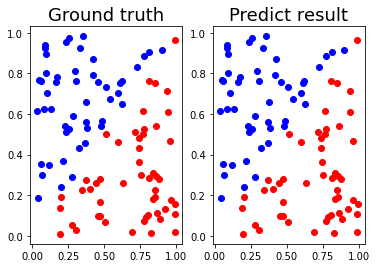

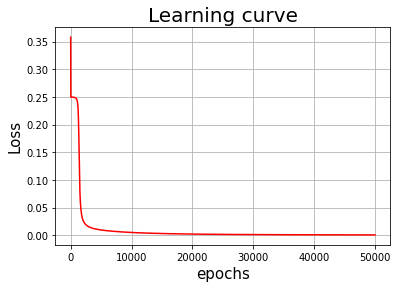

In [60]:
# Random weights initialization
w1 = np.random.uniform(size=(input_Neurons, hid1_Neurons))
w2 = np.random.uniform(size=(hid1_Neurons, hid2_Neurons))
w3 = np.random.uniform(size=(hid2_Neurons, output_Neurons))

# Define epochs and learning rate
epochs = 50000
lr = 0.01

x, t = generate_linear(n=100)
train(epochs, lr, x, t, w1, w2, w3)

## 2. XOR dataset

epoch     0 loss : 0.307514832839266
epoch  1000 loss : 0.249465045911777
epoch  2000 loss : 0.249459624873353
epoch  3000 loss : 0.249454501164008
epoch  4000 loss : 0.249448692672760
epoch  5000 loss : 0.249440987259974
epoch  6000 loss : 0.249428966032728
epoch  7000 loss : 0.249405961501141
epoch  8000 loss : 0.249347978942331
epoch  9000 loss : 0.249125850332017
epoch 10000 loss : 0.247088304281435
epoch 11000 loss : 0.193230526823903
epoch 12000 loss : 0.093245925870184
epoch 13000 loss : 0.048020119584825
epoch 14000 loss : 0.012218699290464
epoch 15000 loss : 0.002927479580109
epoch 16000 loss : 0.001250846150457
epoch 17000 loss : 0.000736993074339
epoch 18000 loss : 0.000507637824747
epoch 19000 loss : 0.000381931692059
epoch 20000 loss : 0.000303859932198
epoch 21000 loss : 0.000251162571906
epoch 22000 loss : 0.000213425259314
epoch 23000 loss : 0.000185183630182
epoch 24000 loss : 0.000163316586697
epoch 25000 loss : 0.000145921103087
epoch 26000 loss : 0.000131775143019
e

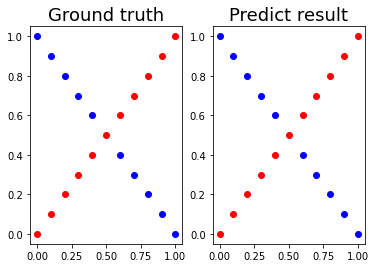

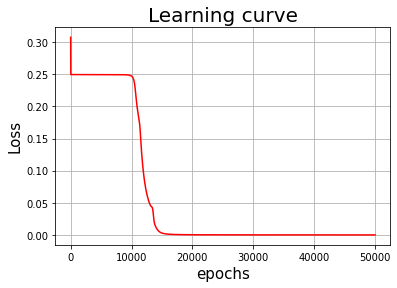

In [64]:
# Random weights initialization
w1 = np.random.uniform(size=(input_Neurons, hid1_Neurons))
w2 = np.random.uniform(size=(hid1_Neurons, hid2_Neurons))
w3 = np.random.uniform(size=(hid2_Neurons, output_Neurons))

# Define epochs and learning rate
epochs = 50000
lr = 0.1

x, t = generate_XOR_easy()
train(epochs, lr, x, t, w1, w2, w3)